In [1]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
assets = ['AMGN', 'JNJ', 'MRK']

In [3]:
weights = np.array([0.33,0.33,0.33])

In [4]:
stockStartDate = '2013-01-01'

In [5]:
today = datetime.today().strftime('%Y-%m-%d')
today

'2022-02-02'

In [6]:
df = pd.DataFrame()
for stock in assets:
    df[stock] = web.DataReader(stock, data_source = 'yahoo', start = stockStartDate, end = today)['Adj Close']

In [7]:
 df

,AMGN,JNJ,MRK
Date,,,
2013-01-02,70.994972,55.376453,29.646124
2013-01-03,70.549026,55.298283,30.356092
2013-01-04,70.859596,55.931480,30.097923
2013-01-07,70.501205,55.814201,30.205482
2013-01-08,70.198616,55.822033,30.248514
...,...,...,...
2022-01-26,222.539993,168.380005,79.139999
2022-01-27,224.000000,170.589996,80.580002
2022-01-28,229.139999,171.789993,80.900002


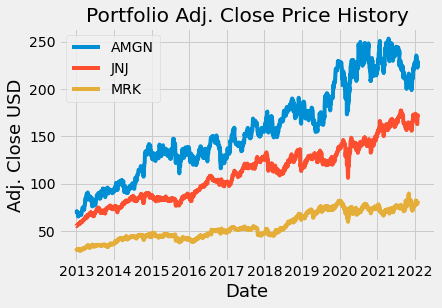

In [8]:
title = 'Portfolio Adj. Close Price History'
my_stocks = df

for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Close USD', fontsize = 18)
plt.legend(my_stocks.columns.values, loc= 'upper left')
plt.show()

In [9]:
returns = df.pct_change()
returns

,AMGN,JNJ,MRK
Date,,,
2013-01-02,NaN,NaN,NaN
2013-01-03,-0.006281,-0.001412,0.023948
2013-01-04,0.004402,0.011451,-0.008505
2013-01-07,-0.005058,-0.002097,0.003574
2013-01-08,-0.004292,0.000140,0.001425
...,...,...,...
2022-01-26,-0.011109,0.004474,-0.004027
2022-01-27,0.006561,0.013125,0.018196
2022-01-28,0.022946,0.007034,0.003971


In [10]:
#annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,AMGN,JNJ,MRK
AMGN,0.065232,0.024418,0.028084
JNJ,0.024418,0.031296,0.020177
MRK,0.028084,0.020177,0.045371


In [11]:
#calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights) )
port_variance

0.031282443573012984

In [12]:
#calculate the portfolio volatility(std dev)
port_volatality = np.sqrt(port_variance)
port_volatality

0.1768684357736365

In [13]:
#calculate annual portfolio returns
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.1438801124778131

In [14]:
#show the expected annual return, volatility(risk), variance
percent_var  = str(round(port_variance, 2) * 100) + '%'
percent_vols  = str(round(port_volatality, 2) * 100) + '%'
percent_ret  = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected Annual Return:' + percent_ret)
print('Annual Volatility/Risk:' + percent_vols)
print('Annual Variance:' + percent_var)

Expected Annual Return:14.000000000000002%
Annual Volatility/Risk:18.0%
Annual Variance:3.0%


In [15]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [16]:
#Portfolio Optimization

#calculate the expected returns and annualized sample covariance matrix of asset returns

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#optimize for max sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('AMGN', 0.12349), ('JNJ', 0.71694), ('MRK', 0.15957)])
Expected annual return: 13.1%
Annual volatility: 16.8%
Sharpe Ratio: 0.66


(0.13067597005682963, 0.16817622769792068, 0.6580952110284373)

In [17]:
#Discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 1000000)

allocation, leftover = da.lp_portfolio()
print('Discrete Allocation:', allocation)
print('Funds Remaining : ${:2f}'.format(leftover))

Long-step dual simplex will be used
Discrete Allocation: {'AMGN': 540, 'JNJ': 4196, 'MRK': 1947}
Funds Remaining : $2.067032
